# PV Data Analyis

## Site data

In [166]:
project_dir = r"C:\Users\jaco.kemp\Documents\DataAnalytics\PV_Project_Submission\DataFiles"
site_data_file = project_dir + r"\site_data.csv"
site_data_1_csv = project_dir + r"\site_data_1.csv"
site_data_2_csv = project_dir + r"\site_data_2.csv"


The site data file size is larger than allowed by Github to be uploaded. The code below splits it into 2 equal file sizes.

with open(site_data_file, 'r') as myfile:
    data=myfile.read()
    
slice_index = int(len(data)/2)
firstpart, secondpart = data[:slice_index], data[slice_index:]

with open(site_data_1_csv, "w") as text_file:
    text_file.write(firstpart)
    
with open(site_data_2_csv, "w") as text_file:
    text_file.write(secondpart)

The cell below combines the 2 site data files into one and writes it to one data file.

In [167]:
with open(site_data_1_csv, 'r') as myfile:
    data1=myfile.read()
    
with open(site_data_2_csv, 'r') as myfile:
    data2=myfile.read()

with open(site_data_file, "w") as text_file: 
    text_file.write(data1 + data2)


Read data into list        

In [168]:
import csv

raw_data = []
header = ""

with open(site_data_file, 'r') as csvFile:    
    reader = csv.reader(csvFile)
    header_row = 0;
    for row in reader:
        if header_row == 0:
            header = row
            header_row =1
        else:
            raw_data.append(row)
csvFile.close()



There are two arrays each going to a substation. The electricity generated is measured at the substations. 
The analysis will combine the energy consumption. The analysis will only be carried out where both substations
generate electricity.

Delete rows where any of the substations generate no electricity
Delete rows where there is an item with no recorded value i.e. string is empty

In [169]:
clean_data = [row for row in raw_data if row[len(row)-2] != "0" and row[len(row)-1] != "0"]
temp = []

for row in clean_data:
    flag = 0
    for item in row:
        if not item:
            flag = 1
    if flag == 0:
        temp.append(row)
        
clean_data = temp

Calculate the average for the measurements taken. The electricity generated is not averaged.

The date time is reformatted.

a[start:end] # items start through end-1
a[start:]    # items start through the rest of the array
a[:end]      # items from the beginning through end-1
a[:]         # a copy of the whole array

In [170]:
def format_date_time(row):   
    temp = row[0].split(':')[0]    
    temp = temp.split('/')
    temp1 = temp[2].split(' ')
    month = ""
    if len(temp[0]) == 1:
        month = "0" + temp[0]
    else:
        month = temp[0]
    day = ""
    if len(temp[1]) == 1:
        day = "0" + temp[1]
    else:
        day = temp[1]
    if len(temp1[1]) == 1:
        time = '0' + temp1[1]
    else:
        time = temp1[1]
    date_time = "{}/{}/{} {}:00".format(temp1[0],month,day,time)  
    return date_time

avg_data = []

for row in clean_data:
    new_row = []    
    new_row.append(format_date_time(row))
    new_row.append(sum([float(i) for i in row[1:4]])/3)
    new_row.append(sum([float(i) for i in row[4:7]])/3)
    new_row.append(sum([float(i[:-1]) for i in row[7:10]])/3)
    new_row.append(sum([float(i) for i in row[10:13]])/3)
    new_row.append(sum([float(i) for i in row[13:62]])/49)
    new_row.append(sum([float(i) for i in row[62:111]])/49)
    new_row.append(sum([float(i) for i in row[113:]]))
    avg_data.append(new_row)    

Readings are taken every 5 minutes. Calculate the hourly average. Group 5 minute readings in dict with key = date/time.

In [171]:
data_dict = {}
for row in avg_data:
    key = row[0]
    if key in data_dict:
        data_dict[key].append(row[1:])
    else:
        data_dict[key] = []
        data_dict[key].append(row[1:])

In [172]:
ave_data_list = []

for key in data_dict:
    temp = 0.0
    press = 0.0
    hum = 0.0
    irrad_hor = 0.0
    mod_temp = 0.0
    mod_irrad = 0.0
    elec = 0.0
    for data_list in data_dict[key]:
        temp += data_list[0]
        press += data_list[1]
        hum += data_list[2]
        irrad_hor += data_list[3]
        mod_temp += data_list[4]
        mod_irrad += data_list[5]
        elec += data_list[6]
    temp_ave = temp/len(data_dict[key])
    press_ave = press/len(data_dict[key])
    hum_ave = hum/len(data_dict[key])
    irrad_hor_ave = irrad_hor/len(data_dict[key])
    mod_temp_ave = mod_temp/len(data_dict[key])
    mod_irrad_ave = mod_irrad/len(data_dict[key])
    row = [key, temp_ave, press_ave, hum_ave, irrad_hor_ave, mod_temp_ave, mod_irrad_ave, elec]
    ave_data_list.append(row)

Convert the list to padas dataframe and sort by date

In [173]:
import pandas as pd

headings = ["Date_Time", "Ambient_Temperature", "Barometric_Pressure", "Relative_Humidity", "Irradiance_at_horizontal_level", "Module_Temperature", "Average_Irradiance_on_Modules", "Electricity_Generated"]
site_df = pd.DataFrame(ave_data_list, columns=headings)
site_df.sort_values("Date_Time")
site_df

,Date_Time,Ambient_Temperature,Barometric_Pressure,Relative_Humidity,Irradiance_at_horizontal_level,Module_Temperature,Average_Irradiance_on_Modules,Electricity_Generated
0,2016/03/08 13:00,23.669333,875.960333,45.546000,428.898667,43.986000,482.370000,428.89
1,2016/03/08 14:00,25.027778,875.729722,38.496111,583.239167,43.845833,648.833333,1832.63
2,2016/03/08 15:00,26.352778,875.204444,33.409722,541.016667,45.367500,614.126667,2194.19
3,2016/03/08 16:00,26.158333,874.915278,33.584167,432.112222,36.110000,471.409167,23458.99
4,2016/03/08 17:00,26.110000,874.804667,32.406667,144.673333,28.698000,145.024000,4345.49
5,2016/03/09 07:00,17.161667,878.360000,76.321667,304.845000,19.695000,302.395000,606.74
6,2016/03/09 08:00,18.792500,878.404444,68.741667,447.923333,27.843333,458.941667,7911.34
7,2016/03/09 09:00,21.570000,878.249167,60.843889,671.958056,37.618333,710.260000,7262.15
8,2016/03/09 10:00,24.304444,878.192778,52.301667,860.429167,46.664167,920.501667,57100.23
9,2016/03/09 11:00,26.001389,877.845833,46.271667,904.994444,49.694167,988.743333,40258.86


## Weather Data

In [174]:
weather_csv = project_dir + r"\closest_weatherStation_data.csv"
weather_df = pd.read_csv(weather_csv,header='infer')
weather_df_selected = weather_df[['dt_iso', 'temp', 'clouds_all']].copy()
weather_df_selected.rename(columns={'dt_iso': 'Date_Time', 'temp': 'Temperature', 'clouds_all': "Cload_Cover"}, inplace=True)

weather_df_selected['Temperature'] = weather_df_selected['Temperature'].apply(lambda x: float(x)-273.0)
weather_df_selected['Date_Time'] = weather_df_selected['Date_Time'].apply(lambda x: x[:16].replace('-', '/'))

weather_df_selected

,Date_Time,Temperature,Cload_Cover
0,2013/01/01 00:00,27.600,48
1,2013/01/01 01:00,27.600,48
2,2013/01/01 02:00,27.600,48
3,2013/01/01 03:00,27.600,48
4,2013/01/01 04:00,27.600,48
5,2013/01/01 05:00,27.600,48
6,2013/01/01 06:00,27.600,48
7,2013/01/01 07:00,30.010,0
8,2013/01/01 08:00,30.010,0
9,2013/01/01 09:00,30.010,0


## Meteonorm weather data for clear skies

In [175]:
meteonorm_csv = project_dir + r"\site_meteonorm_data_unformatted.csv"

Add Date Time column in same format as other two data sets

In [176]:
def create_date(row, year):   
    month_int = int(row['Month'])
    month = ""
    if row['Month'] < 10:
        month = "0" + str(month_int) + "/"        
    else:
        month = str(month_int) + "/"
    day_int = int(row['Day'])
    day = ""
    if day_int < 10:
        day = "0" + str(day_int) + ' '
    else:
        day = str(day_int) + ' '
    hour_int = int(row['Hour'])
    hour = ""
    if hour_int < 10:
        hour = "0" + str(hour_int) + ":00"
    elif hour_int == 24:
        hour = "00:00"
    else:
        hour = str(hour_int) + ":00"
    return year + month + day + hour

def create_year_df(file, year):
    df = pd.read_csv(file,header='infer')
    df['Solar_azimuth'] = df['Solar_azimuth'].apply(lambda x: abs(x))
    df['Date_Time'] = df.apply (lambda row: create_date (row, year),axis=1)
    return df[['Date_Time','Global_radiation_horizontal', 'Diffuse_radiation_horizontal', 'Global_radiation_tilted_plane', 'Diffuse_radiation_tilted_plane', 'Solar_azimuth', 'Height_of_sun']].copy()

df_2016 = create_year_df(meteonorm_csv, "2016/")
df_2017 = create_year_df(meteonorm_csv, "2017/")
df_2018 = create_year_df(meteonorm_csv, "2018/")

frames = [df_2016,df_2017,df_2018]
meteonorm_df = pd.concat(frames)
meteonorm_df

,Date_Time,Global_radiation_horizontal,Diffuse_radiation_horizontal,Global_radiation_tilted_plane,Diffuse_radiation_tilted_plane,Solar_azimuth,Height_of_sun
0,2016/01/01 01:00,0,0,0,0,9.3,0.0
1,2016/01/01 02:00,0,0,0,0,25.3,0.0
2,2016/01/01 03:00,0,0,0,0,39.0,0.0
3,2016/01/01 04:00,0,0,0,0,50.1,0.0
4,2016/01/01 05:00,0,0,0,0,59.1,0.0
5,2016/01/01 06:00,23,11,51,20,66.5,6.2
6,2016/01/01 07:00,205,47,264,61,73.3,18.3
7,2016/01/01 08:00,462,73,486,87,79.5,30.9
8,2016/01/01 09:00,713,88,676,100,86.2,43.7
9,2016/01/01 10:00,929,95,831,105,94.0,56.6


## Combine Data Sets

In [177]:
combined_df = pd.merge(site_df, weather_df_selected, how='inner', on="Date_Time", left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
combined_df

,Date_Time,Ambient_Temperature,Barometric_Pressure,Relative_Humidity,Irradiance_at_horizontal_level,Module_Temperature,Average_Irradiance_on_Modules,Electricity_Generated,Temperature,Cload_Cover
0,2016/03/08 13:00,23.669333,875.960333,45.546000,428.898667,43.986000,482.370000,428.89,22.341,12
1,2016/03/08 15:00,26.352778,875.204444,33.409722,541.016667,45.367500,614.126667,2194.19,22.341,12
2,2016/03/08 17:00,26.110000,874.804667,32.406667,144.673333,28.698000,145.024000,4345.49,17.986,0
3,2016/03/09 07:00,17.161667,878.360000,76.321667,304.845000,19.695000,302.395000,606.74,23.410,0
4,2016/03/09 09:00,21.570000,878.249167,60.843889,671.958056,37.618333,710.260000,7262.15,23.410,0
5,2016/03/09 11:00,26.001389,877.845833,46.271667,904.994444,49.694167,988.743333,40258.86,26.632,12
6,2016/03/09 13:00,27.828333,876.618333,33.971667,674.125278,43.721667,707.375000,29738.04,26.611,24
7,2016/03/09 15:00,28.478333,875.468889,29.732778,358.580278,33.720000,381.840000,23858.23,26.611,24
8,2016/03/09 17:00,29.045000,874.780833,27.044444,284.435556,33.778333,306.469167,19983.37,20.235,8
9,2016/03/10 07:00,19.327222,876.795556,76.425833,174.759444,19.598333,171.790000,9442.25,25.367,0


In [178]:
data_set = pd.merge(combined_df, meteonorm_df, how='inner', on="Date_Time", left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_set

,Date_Time,Ambient_Temperature,Barometric_Pressure,Relative_Humidity,Irradiance_at_horizontal_level,Module_Temperature,Average_Irradiance_on_Modules,Electricity_Generated,Temperature,Cload_Cover,Global_radiation_horizontal,Diffuse_radiation_horizontal,Global_radiation_tilted_plane,Diffuse_radiation_tilted_plane,Solar_azimuth,Height_of_sun
0,2016/03/08 13:00,23.669333,875.960333,45.546000,428.898667,43.986000,482.370000,428.89,22.341,12,1102,83,773,85,165.6,63.9
1,2016/03/08 15:00,26.352778,875.204444,33.409722,541.016667,45.367500,614.126667,2194.19,22.341,12,966,82,694,87,119.3,47.6
2,2016/03/08 17:00,26.110000,874.804667,32.406667,144.673333,28.698000,145.024000,4345.49,17.986,0,564,69,444,76,97.6,23.1
3,2016/03/09 07:00,17.161667,878.360000,76.321667,304.845000,19.695000,302.395000,606.74,23.410,0,34,12,34,14,89.0,7.8
4,2016/03/09 09:00,21.570000,878.249167,60.843889,671.958056,37.618333,710.260000,7262.15,23.410,0,512,66,383,70,105.5,33.3
5,2016/03/09 11:00,26.001389,877.845833,46.271667,904.994444,49.694167,988.743333,40258.86,26.632,12,934,81,660,84,134.2,55.8
6,2016/03/09 13:00,27.828333,876.618333,33.971667,674.125278,43.721667,707.375000,29738.04,26.611,24,1098,82,767,85,165.6,63.5
7,2016/03/09 15:00,28.478333,875.468889,29.732778,358.580278,33.720000,381.840000,23858.23,26.611,24,961,82,687,87,119.5,47.3
8,2016/03/09 17:00,29.045000,874.780833,27.044444,284.435556,33.778333,306.469167,19983.37,20.235,8,559,68,436,75,98.2,22.8
9,2016/03/10 07:00,19.327222,876.795556,76.425833,174.759444,19.598333,171.790000,9442.25,25.367,0,33,12,32,13,89.2,7.6


In [179]:
data_set.describe()

,Ambient_Temperature,Barometric_Pressure,Relative_Humidity,Irradiance_at_horizontal_level,Module_Temperature,Average_Irradiance_on_Modules,Electricity_Generated,Temperature,Cload_Cover,Global_radiation_horizontal,Diffuse_radiation_horizontal,Global_radiation_tilted_plane,Diffuse_radiation_tilted_plane,Solar_azimuth,Height_of_sun
count,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000
mean,21.630159,879.534057,34.813088,520.516151,31.457357,561.765139,41170.300165,21.202573,16.651789,592.781443,68.924075,412.784112,69.889388,119.303820,33.938981
std,7.949377,4.355557,22.063766,324.565713,13.408099,347.802668,29413.558352,7.589098,29.183801,360.992964,29.982504,315.404873,32.311648,28.725039,21.020217
min,-8.821333,868.599333,2.453333,0.000000,-11.058000,0.000000,1.620000,-8.545000,0.000000,0.000000,0.000000,0.000000,0.000000,39.100000,0.000000
25%,16.573056,876.351944,17.045833,225.945556,22.028333,231.860833,15802.760000,16.241000,0.000000,288.000000,54.000000,129.000000,51.000000,95.500000,17.100000
50%,21.960000,879.245000,29.088333,523.309444,32.396667,568.762500,44131.410000,21.544000,0.000000,621.000000,77.000000,362.000000,77.000000,117.300000,32.900000
75%,27.810476,882.451667,48.391667,785.935833,41.556667,882.182500,65723.420000,26.980000,20.000000,895.000000,90.000000,676.000000,94.000000,140.600000,48.700000
max,38.868333,892.600278,99.656667,1198.745000,62.375833,1186.165000,988724.820000,37.884000,100.000000,1241.000000,122.000000,1057.000000,130.000000,174.200000,81.600000


C:\Users\jaco.kemp\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


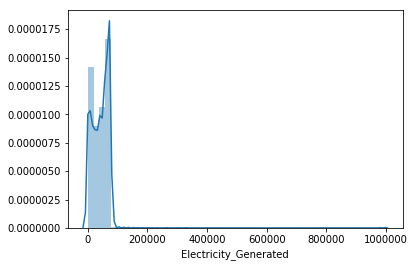

In [180]:
import seaborn as sbn
sbn.distplot(data_set['Electricity_Generated'])

## Clean combined data set

In [181]:
top_elec = data_set['Electricity_Generated'].nlargest(10)
top_elec

1218    988724.82
5586    770643.33
1374    328166.74
5525    266434.16
7920     96623.19
7919     96612.89
1375     96321.03
5688     93398.87
7921     90261.58
3347     88443.99
Name: Electricity_Generated, dtype: float64

In [182]:
data_set = data_set[data_set.Electricity_Generated < 100000]
data_set.count()

Date_Time                         8241
Ambient_Temperature               8241
Barometric_Pressure               8241
Relative_Humidity                 8241
Irradiance_at_horizontal_level    8241
Module_Temperature                8241
Average_Irradiance_on_Modules     8241
Electricity_Generated             8241
Temperature                       8241
Cload_Cover                       8241
Global_radiation_horizontal       8241
Diffuse_radiation_horizontal      8241
Global_radiation_tilted_plane     8241
Diffuse_radiation_tilted_plane    8241
Solar_azimuth                     8241
Height_of_sun                     8241
dtype: int64

In [183]:
top_Irr_Hor = data_set['Irradiance_at_horizontal_level'].nlargest(10)
top_Irr_Hor


2281    1198.745000
2675    1190.594444
2572    1184.689722
6823    1168.909167
2974    1167.381944
2662    1166.448333
6758    1165.897500
6913    1165.471667
2624    1165.434722
7095    1163.344444
Name: Irradiance_at_horizontal_level, dtype: float64

C:\Users\jaco.kemp\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


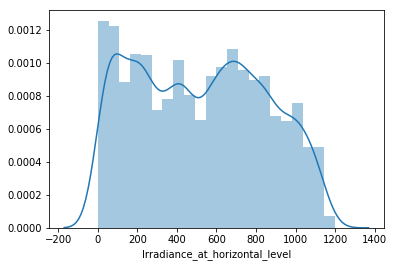

In [184]:
sbn.distplot(data_set['Irradiance_at_horizontal_level'])

In [185]:
data_set = data_set[data_set.Irradiance_at_horizontal_level < 1200]
data_set.count()

Date_Time                         8241
Ambient_Temperature               8241
Barometric_Pressure               8241
Relative_Humidity                 8241
Irradiance_at_horizontal_level    8241
Module_Temperature                8241
Average_Irradiance_on_Modules     8241
Electricity_Generated             8241
Temperature                       8241
Cload_Cover                       8241
Global_radiation_horizontal       8241
Diffuse_radiation_horizontal      8241
Global_radiation_tilted_plane     8241
Diffuse_radiation_tilted_plane    8241
Solar_azimuth                     8241
Height_of_sun                     8241
dtype: int64

In [186]:
top_Irr_Ave = data_set['Average_Irradiance_on_Modules'].nlargest(10)
top_Irr_Ave

2281    1186.165000
6474    1179.405000
6331    1168.949167
6190    1168.925000
1749    1167.850833
2572    1164.000000
7625    1163.299167
1880    1158.522500
6178    1158.339167
3195    1156.142500
Name: Average_Irradiance_on_Modules, dtype: float64

C:\Users\jaco.kemp\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


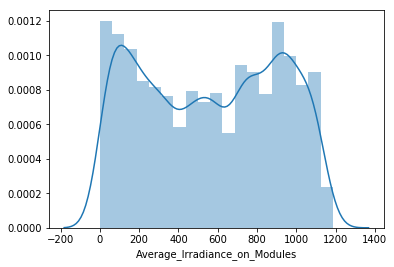

In [187]:
sbn.distplot(data_set['Average_Irradiance_on_Modules'])

In [188]:
data_set = data_set[data_set.Average_Irradiance_on_Modules < 1200]
data_set.count()

Date_Time                         8241
Ambient_Temperature               8241
Barometric_Pressure               8241
Relative_Humidity                 8241
Irradiance_at_horizontal_level    8241
Module_Temperature                8241
Average_Irradiance_on_Modules     8241
Electricity_Generated             8241
Temperature                       8241
Cload_Cover                       8241
Global_radiation_horizontal       8241
Diffuse_radiation_horizontal      8241
Global_radiation_tilted_plane     8241
Diffuse_radiation_tilted_plane    8241
Solar_azimuth                     8241
Height_of_sun                     8241
dtype: int64

### Export data set for building model in Azure Machine Learning Studio

In [189]:
data_set_for_analysis = data_set[['Electricity_Generated', 'Temperature', 'Cload_Cover', 'Global_radiation_horizontal', 'Diffuse_radiation_horizontal', 'Global_radiation_tilted_plane', 'Diffuse_radiation_tilted_plane', 'Solar_azimuth','Height_of_sun']].copy()
#data_set_for_analysis.to_csv(project_dir + r"\data_set_for_analysis.csv")

# Exploratory Analayis

In [190]:
data_set_for_analysis.describe()

,Electricity_Generated,Temperature,Cload_Cover,Global_radiation_horizontal,Diffuse_radiation_horizontal,Global_radiation_tilted_plane,Diffuse_radiation_tilted_plane,Solar_azimuth,Height_of_sun
count,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000
mean,40904.642132,21.204239,16.658415,592.753307,68.916394,412.828055,69.885329,119.293265,33.938939
std,25996.347051,7.589276,29.189109,361.042820,29.984934,315.454065,32.316289,28.724571,21.022803
min,1.620000,-8.545000,0.000000,0.000000,0.000000,0.000000,0.000000,39.100000,0.000000
25%,15798.770000,16.245000,0.000000,288.000000,54.000000,129.000000,51.000000,95.500000,17.100000
50%,44098.510000,21.544000,0.000000,620.000000,77.000000,362.000000,77.000000,117.300000,32.900000
75%,65708.290000,26.980000,20.000000,895.000000,90.000000,676.000000,94.000000,140.600000,48.800000
max,96623.190000,37.884000,100.000000,1241.000000,122.000000,1057.000000,130.000000,174.200000,81.600000


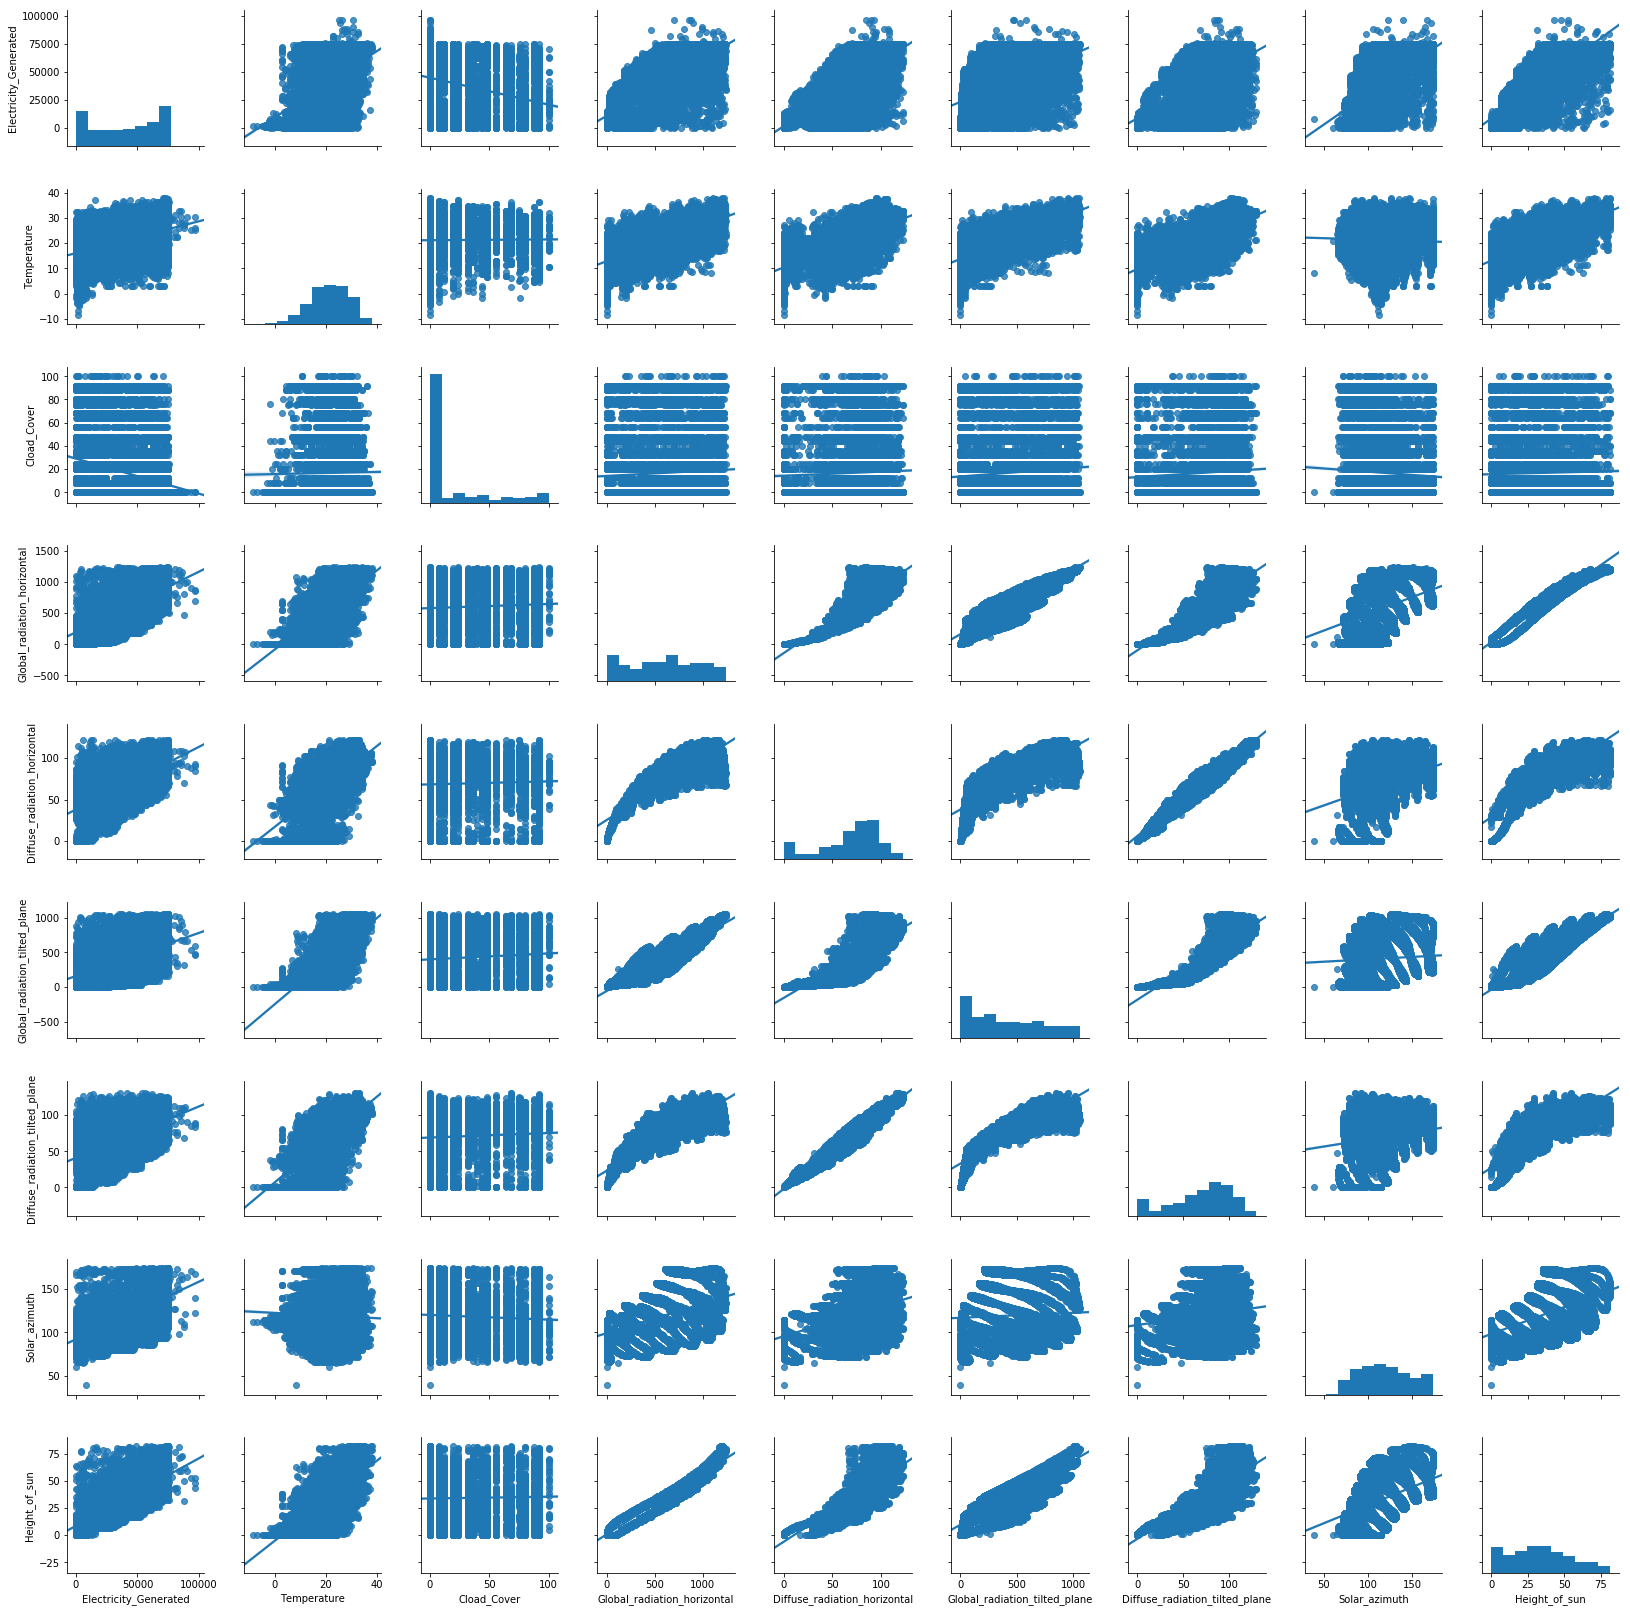

In [191]:

sbn.pairplot(data_set, vars=['Electricity_Generated', 'Temperature', 'Cload_Cover', 'Global_radiation_horizontal', 'Diffuse_radiation_horizontal', 'Global_radiation_tilted_plane', 'Diffuse_radiation_tilted_plane', 'Solar_azimuth','Height_of_sun'],kind='reg')  

Create a scatter plot of the data

    Args:
        df (pd.DataFrame):      The data set to plot
        xlim ((float, float)):  The x-axis limits
        ylim ((float, float)):  The y-axis limits
        color (str):            The color of the scatter points
        marker (str):           The marker style for the scatter points
        reg_fit (bool):         Whether to plot a linear regression on the graph


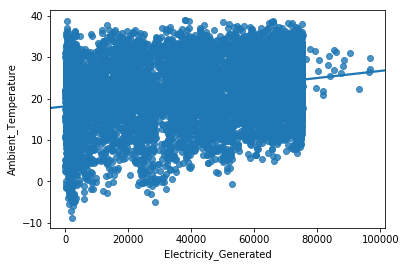

In [192]:
sbn.regplot(x='Electricity_Generated', y='Ambient_Temperature', data=data_set, ci=None,fit_reg=True,)

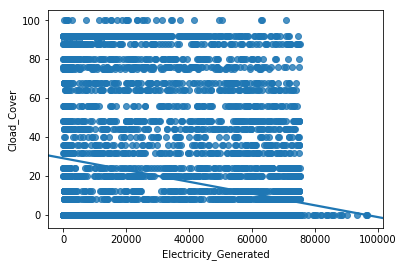

In [193]:
sbn.regplot(x='Electricity_Generated', y='Cload_Cover', data=data_set, ci=None,fit_reg=True,)


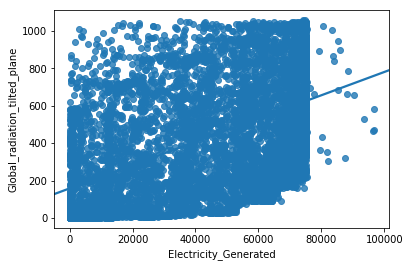

In [194]:
sbn.regplot(x='Electricity_Generated', y='Global_radiation_tilted_plane', data=data_set, ci=None,fit_reg=True,)

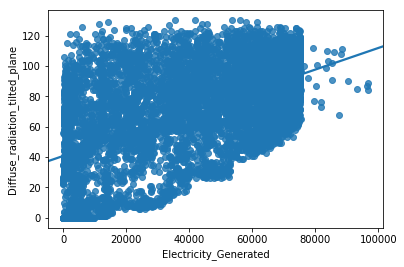

In [195]:
sbn.regplot(x='Electricity_Generated', y='Diffuse_radiation_tilted_plane', data=data_set, ci=None,fit_reg=True,)

In [196]:
import statsmodels.api as sm
x = data_set[['Temperature', 'Cload_Cover', 'Global_radiation_horizontal', 'Diffuse_radiation_horizontal', 'Global_radiation_tilted_plane', 'Diffuse_radiation_tilted_plane', 'Solar_azimuth','Height_of_sun']].copy()
y = data_set['Electricity_Generated']

In [197]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Electricity_Generated   R-squared:                       0.942
Model:                               OLS   Adj. R-squared:                  0.941
Method:                    Least Squares   F-statistic:                 1.657e+04
Date:                   Sun, 12 Aug 2018   Prob (F-statistic):               0.00
Time:                           17:30:48   Log-Likelihood:                -88903.
No. Observations:                   8241   AIC:                         1.778e+05
Df Residuals:                       8233   BIC:                         1.779e+05
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Temperature                      207.6459     24.848      8.357      0.000     158.938     256.354
Cload_Cover                     -213.5067      4.470    -47.761      0.000    -222.270    -204.744
Global_radiation_horizontal      -10.4426      2.082     -5.015      0.000     -14.525      -6.360
Diffuse_radiation_horizontal     122.6994     45.812      2.678      0.007      32.897     212.502
Global_radiation_tilted_plane    -66.5965      2.693    -24.734      0.000     -71.875     -61.318
Diffuse_radiation_tilted_plane    83.1169     45.799      1.815      0.070      -6.660     172.894
Solar_azimuth                     11.0291      4.578      2.409      0.016       2.056      20.002
Height_of_sun                   1712.5045     27.671     61.889      0.000    1658.263    1766.746
==============================================================================
Omnibus:                     1664.782   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4205.552
Skew:                          -1.107   Prob(JB):                         0.00
Kurtosis:                       5.711   Cond. No.                         447.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
x = data_set[['Temperature']].copy()
y = data_set['Electricity_Generated']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Electricity_Generated   R-squared:                       0.762
Model:                               OLS   Adj. R-squared:                  0.762
Method:                    Least Squares   F-statistic:                 2.636e+04
Date:                   Sun, 12 Aug 2018   Prob (F-statistic):               0.00
Time:                           17:30:48   Log-Likelihood:                -94690.
No. Observations:                   8241   AIC:                         1.894e+05
Df Residuals:                       8240   BIC:                         1.894e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature  1878.3767     11.568    162.370      0.000    1855.700    1901.054
==============================================================================
Omnibus:                      632.906   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.527
Skew:                          -0.093   Prob(JB):                     3.53e-48
Kurtosis:                       2.224   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
x = data_set[['Cload_Cover']].copy()
y = data_set['Electricity_Generated']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Electricity_Generated   R-squared:                       0.086
Model:                               OLS   Adj. R-squared:                  0.086
Method:                    Least Squares   F-statistic:                     772.0
Date:                   Sun, 12 Aug 2018   Prob (F-statistic):          1.72e-162
Time:                           17:30:48   Log-Likelihood:            -1.0023e+05
No. Observations:                   8241   AIC:                         2.005e+05
Df Residuals:                       8240   BIC:                         2.005e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cload_Cover   422.0909     15.191     27.785      0.000     392.312     451.870
==============================================================================
Omnibus:                     1535.786   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              507.976
Skew:                          -0.389   Prob(JB):                    4.95e-111
Kurtosis:                       2.065   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
x = data_set[['Global_radiation_horizontal']].copy()
y = data_set['Electricity_Generated']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Electricity_Generated   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                 4.340e+04
Date:                   Sun, 12 Aug 2018   Prob (F-statistic):               0.00
Time:                           17:30:48   Log-Likelihood:                -93040.
No. Observations:                   8241   AIC:                         1.861e+05
Df Residuals:                       8240   BIC:                         1.861e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Global_radiation_horizontal    64.0176      0.307    208.322      0.000      63.415      64.620
==============================================================================
Omnibus:                      203.382   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.223
Skew:                          -0.398   Prob(JB):                     4.11e-48
Kurtosis:                       3.057   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
x = data_set[['Diffuse_radiation_horizontal']].copy()
y = data_set['Electricity_Generated']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Electricity_Generated   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.836
Method:                    Least Squares   F-statistic:                 4.212e+04
Date:                   Sun, 12 Aug 2018   Prob (F-statistic):               0.00
Time:                           17:30:48   Log-Likelihood:                -93143.
No. Observations:                   8241   AIC:                         1.863e+05
Df Residuals:                       8240   BIC:                         1.863e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Diffuse_radiation_horizontal   589.7576      2.873    205.241      0.000     584.125     595.390
==============================================================================
Omnibus:                      509.811   Durbin-Watson:                   0.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.574
Skew:                          -0.579   Prob(JB):                    4.53e-115
Kurtosis:                       2.562   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
x = data_set[['Global_radiation_tilted_plane']].copy()
y = data_set['Electricity_Generated']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Electricity_Generated   R-squared:                       0.702
Model:                               OLS   Adj. R-squared:                  0.702
Method:                    Least Squares   F-statistic:                 1.942e+04
Date:                   Sun, 12 Aug 2018   Prob (F-statistic):               0.00
Time:                           17:30:48   Log-Likelihood:                -95613.
No. Observations:                   8241   AIC:                         1.912e+05
Df Residuals:                       8240   BIC:                         1.912e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Global_radiation_tilted_plane    78.1642      0.561    139.353      0.000      77.065      79.264
==============================================================================
Omnibus:                      103.929   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.458
Skew:                          -0.171   Prob(JB):                     7.54e-19
Kurtosis:                       2.645   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
x = data_set[['Diffuse_radiation_tilted_plane']].copy()
y = data_set['Electricity_Generated']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Electricity_Generated   R-squared:                       0.801
Model:                               OLS   Adj. R-squared:                  0.801
Method:                    Least Squares   F-statistic:                 3.307e+04
Date:                   Sun, 12 Aug 2018   Prob (F-statistic):               0.00
Time:                           17:30:48   Log-Likelihood:                -93960.
No. Observations:                   8241   AIC:                         1.879e+05
Df Residuals:                       8240   BIC:                         1.879e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Diffuse_radiation_tilted_plane   563.1982      3.097    181.848      0.000     557.127     569.269
==============================================================================
Omnibus:                      419.710   Durbin-Watson:                   0.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.084
Skew:                          -0.530   Prob(JB):                     2.02e-95
Kurtosis:                       2.617   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
x = data_set[['Solar_azimuth']].copy()
y = data_set['Electricity_Generated']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Electricity_Generated   R-squared:                       0.803
Model:                               OLS   Adj. R-squared:                  0.803
Method:                    Least Squares   F-statistic:                 3.355e+04
Date:                   Sun, 12 Aug 2018   Prob (F-statistic):               0.00
Time:                           17:30:48   Log-Likelihood:                -93912.
No. Observations:                   8241   AIC:                         1.878e+05
Df Residuals:                       8240   BIC:                         1.878e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Solar_azimuth   353.9053      1.932    183.158      0.000     350.118     357.693
==============================================================================
Omnibus:                     2536.259   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.344
Skew:                          -0.214   Prob(JB):                     1.46e-96
Kurtosis:                       1.950   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
x = data_set[['Height_of_sun']].copy()
y = data_set['Electricity_Generated']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Electricity_Generated   R-squared:                       0.874
Model:                               OLS   Adj. R-squared:                  0.874
Method:                    Least Squares   F-statistic:                 5.715e+04
Date:                   Sun, 12 Aug 2018   Prob (F-statistic):               0.00
Time:                           17:30:48   Log-Likelihood:                -92067.
No. Observations:                   8241   AIC:                         1.841e+05
Df Residuals:                       8240   BIC:                         1.841e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Height_of_sun  1134.9504      4.747    239.067      0.000    1125.644    1144.257
==============================================================================
Omnibus:                      564.981   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.000
Skew:                          -0.586   Prob(JB):                    4.27e-175
Kurtosis:                       3.983   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""